In [6]:
signal = [sixb_from_gnn(out) for out in get_NMSSM_list()]

SyntaxError: invalid syntax (2752383958.py, line 1)

In [12]:
bkg = Bkg(get_qcd_ttbar('maxbtag_4b'))

Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT100to200_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT200to300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT300to500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT500to700_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT700to1000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT1000to1500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT1500to2000_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_bEnriched_HT2000toInf_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_HT100to200_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_HT200to300_BGenFilter_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
Summer2018UL/maxbtag_4b/QCD/QCD_

In [16]:
bkg.spherical_region(cfg='config/bdt_params.cfg')

REGION: concentric


In [21]:
len(bkg.acr_mask), len(bkg.n_loose)

(18886, 18886)

In [5]:
tree = sixb_from_gnn('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root')

[13:36:13] Loading                                                                                    ]8;id=751926;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=869394;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#110\110]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

Running:  ls /uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/weaver-multiH/weaver/models/exp_xy/feynnet_6b/20230621_ranger_lr0.0047_batch1024__99_masses_mxmy_reweighting_withbkg/predict_output


[13:36:18] Loading                                                                                    ]8;id=488935;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=591716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#207\207]8;;\
           /uscms/home/srosenzw/nobackup/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/w              
           eaver-multiH/weaver/models/exp_xy/feynnet_6b/20230621_ranger_lr0.0047_batch1024__99_masses              
           _mxmy_reweighting_withbkg/predict_output/NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madg              
           raph-pythia8.root...                                                                                    

In [7]:
tree.n_loose, tree.n_medium, tree.n_tight

(<Array [0, 1, 0, 1, 0, 1, ... 0, 1, 0, 1, 1, 0] type='79508 * int64'>,
 <Array [1, 0, 2, 1, 1, 1, ... 1, 1, 0, 0, 1, 0] type='79508 * int64'>,
 <Array [3, 4, 2, 4, 5, 3, ... 5, 4, 6, 4, 3, 5] type='79508 * int64'>)

In [26]:
tree.spherical_region()

REGION: concentric


0.8831849135673128
0.829294124976637


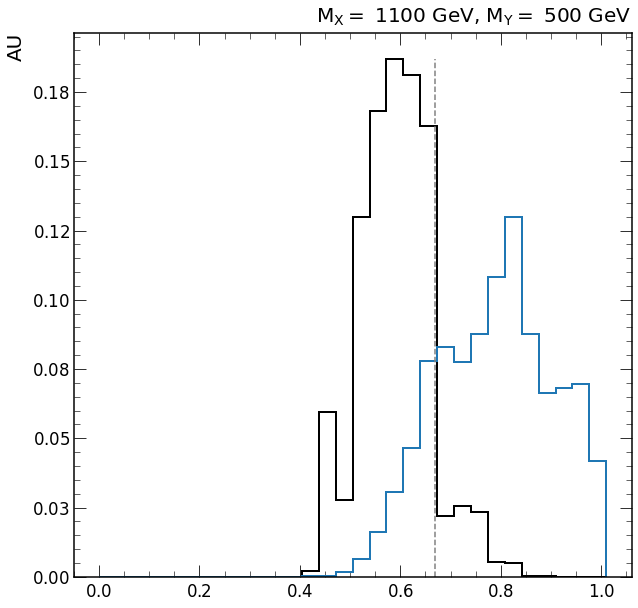

In [54]:
fig, ax = plt.subplots()

bins = np.linspace(0,1.01,31)
n_bkg = bkg.hist(bkg.btag_avg, mask=bkg.acr_mask, bins=bins, density=True, label='bkg', ax=ax)
n_sig = tree.hist(tree.btag_avg[tree.asr_mask], bins=bins, density=True, label='signal', ax=ax)



cut = 0.67
print(ak.sum(bkg.btag_avg[bkg.acr_mask] < cut)/bkg.acr_mask.sum())
print(ak.sum(tree.btag_avg[tree.asr_mask] >= cut)/tree.asr_mask.sum())
ax.plot([cut, cut],[0, n_bkg.max()], linestyle='--', color='grey')

In [53]:
mask = n_bkg > n_sig
bins[1:][mask][-1]

0.6733333333333333

0.9862348116482715
0.5293751168150402


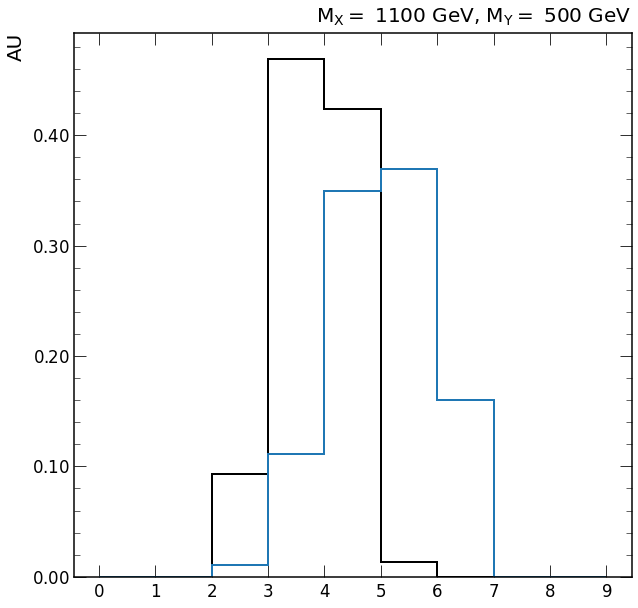

In [32]:
fig, ax = plt.subplots()

n = bkg.hist(bkg.n_tight, mask=bkg.acr_mask, bins=np.arange(10), density=True, label='bkg', ax=ax)
print(n[:5].sum()/n.sum())
n = tree.hist(tree.n_tight[tree.asr_mask], bins=np.arange(10), density=True, label='signal', ax=ax)
print(n[5:].sum()/n.sum())


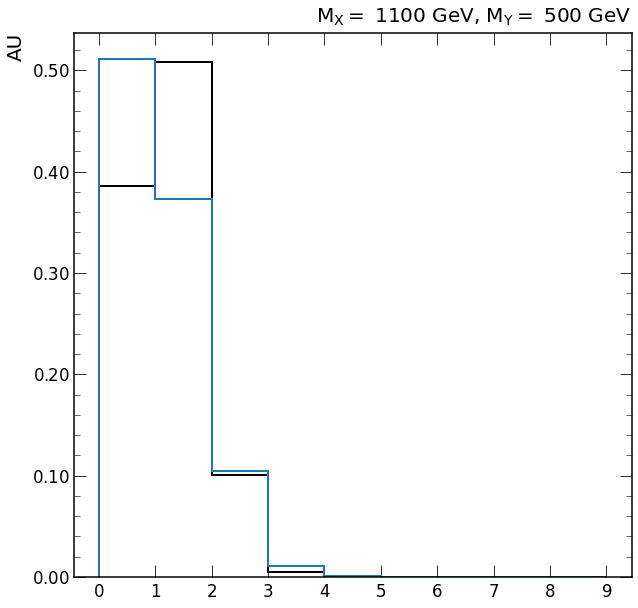

In [35]:
fig, ax = plt.subplots()

n = bkg.hist(bkg.n_medium, mask=bkg.acr_mask, bins=np.arange(10), density=True, label='bkg', ax=ax)
n = tree.hist(tree.n_medium[tree.asr_mask], bins=np.arange(10), density=True, label='signal', ax=ax)

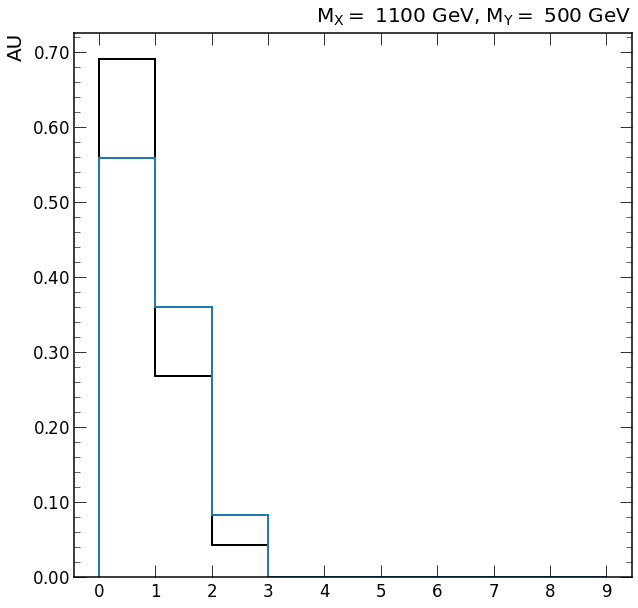

In [36]:
fig, ax = plt.subplots()

n = bkg.hist(bkg.n_loose, mask=bkg.acr_mask, bins=np.arange(10), density=True, label='bkg', ax=ax)
n = tree.hist(tree.n_loose[tree.asr_mask], bins=np.arange(10), density=True, label='signal', ax=ax)